In [2]:
from dimelo.parse_bam import *
import sys
import os
import matplotlib.pyplot as plt
import h5py


from dimelo.plot_single_reads import *

In [3]:
!../dependencies/linux/modkit/modkit update-tags \
/clusterfs/nilah/oberon/cd55_cas9/cas9_12ef_101923_misha_mod_mappings.sorted_mC_only.bam \
/clusterfs/nilah/oberon/cd55_cas9/cas9_12ef_101923_misha_mod_mappings.retagged.sorted_mC_only.bam \
--threads 32 --mode ambiguous \
--log-filepath /clusterfs/nilah/oberon/dimelo_dev_source/test_inputs/update_tags.log

> done, 244270 records processed, 0 failed, 44 skipped                          


In [4]:
!module load samtools && samtools index \
/clusterfs/nilah/oberon/cd55_cas9/cas9_12ef_101923_misha_mod_mappings.retagged.sorted_mC_only.bam

In [18]:
chromosome = 'chr1'
start_co = 206586162
end_co = 206586192
# start_co = 206582739-5000
# end_co = 206590739+5000
sample_name = f'dimelo-parsing_{chromosome}{start_co}-{end_co}'
region_string = f'{chromosome}:{start_co}-{end_co}'
num_cores = 32
outfile = parse_bam_modkit_extract(
    input_file='/clusterfs/nilah/oberon/cd55_cas9/cas9_12ef_101923_misha_mod_mappings.retagged.sorted_mC_only.bam',
    output_name=sample_name,
    ref_genome='/clusterfs/nilah/oberon/genomes/chm13.draft_v1.1.fasta',
    region_str=region_string,
    basemods=['CG,0'],
    cores=num_cores,
    thresh=0.9,
    window_size=0,
)

No output directory provided, using input directory /clusterfs/nilah/oberon/cd55_cas9
Processing from region chr1:206586162-206586192.
Allocating requested 32 cores.
Modification threshold of 0.9 will be treated as coming from range 0-1.
Extracting CG,0 sites


> specifying a motif (including --cpg) outputs only mapped sites
> found BAM index, processing reads in 100000 base pair chunks
> processed 935 reads, 126528 rows, skipped ~0 reads, failed ~0 reads


Adding CG,0 to /clusterfs/nilah/oberon/cd55_cas9/dimelo-parsing_chr1206586162-206586192/reads.combined_basemods.h5
935 reads found in /clusterfs/nilah/oberon/cd55_cas9/dimelo-parsing_chr1206586162-206586192/reads.CG,0.txt
6636.495187165775


Using window size defined by bed file chr1_206586162-206586192.bed.


Text(0.5, 1.0, 'cas9_12ef_101923_misha_mod_mappings.retagged.sorted_mC_only.bam CpG extraction')

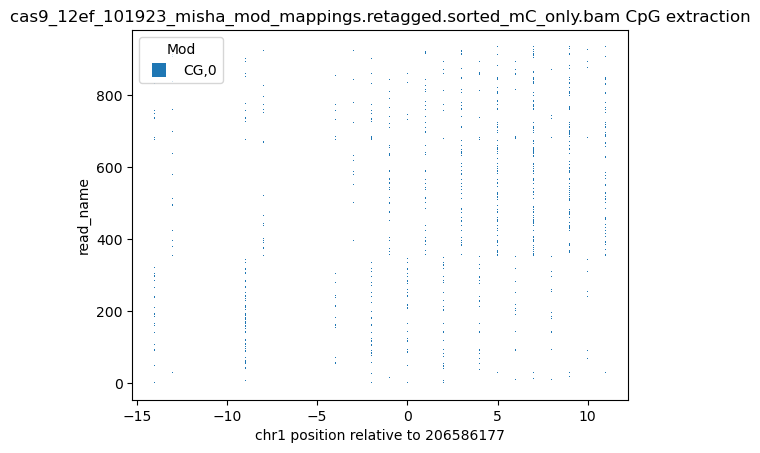

In [19]:
plot_single_reads_rectangle(outfile,
                            '/clusterfs/nilah/oberon/cd55_cas9/chr1_206586162-206586192.bed',
                                ['CG,0'],
                                window_size = 0)
plt.xlabel('chr1 position relative to 206586177')
plt.title('cas9_12ef_101923_misha_mod_mappings.retagged.sorted_mC_only.bam CpG extraction')

In [3]:
input_txt_1 = '/clusterfs/nilah/oberon/datasets/dimelo_mA-mGpC/20230702_jm_lmnb1_acessibility_redux/megalodon_all_context/mod_mappings.01.chr1_1MB.txt'
input_txt_1a = '/clusterfs/nilah/oberon/datasets/dimelo_mA-mGpC/20230702_jm_lmnb1_acessibility_redux/megalodon_all_context/mod_mappings.01.chr1_1MB.A,0.txt'
input_txt_1b = '/clusterfs/nilah/oberon/datasets/dimelo_mA-mGpC/20230702_jm_lmnb1_acessibility_redux/megalodon_all_context/mod_mappings.01.chr1_1MB.CG,0.txt'
input_txt_1c = '/clusterfs/nilah/oberon/datasets/dimelo_mA-mGpC/20230702_jm_lmnb1_acessibility_redux/megalodon_all_context/mod_mappings.01.chr1_1MB.GCH,1.txt'
input_txt_2 = '/clusterfs/nilah/oberon/dimelo_dev_source/test_inputs/deep_ctcf_ENCFF797SDL.txt'
output_h5_1 = '/clusterfs/nilah/oberon/datasets/dimelo_mA-mGpC/20230702_jm_lmnb1_acessibility_redux/megalodon_all_context/mod_mappings.01.chr1_1MB.h5'
output_h5_2 = '/clusterfs/nilah/oberon/dimelo_dev_source/test_inputs/deep_ctcf_ENCFF797SDL.h5'

with open(output_h5_1,'w') as f:
    pass
with open(output_h5_2,'w') as f:
    pass

utils.read_by_base_txt_to_hdf5(
    input_txt_1a,
    output_h5_1,
    'A,0',
    0.5,
)
# utils.read_by_base_txt_to_hdf5(
#     input_txt_1b,
#     output_h5_1,
#     'CG,0',
#     0.5,
# )
# utils.read_by_base_txt_to_hdf5(
#     input_txt_1c,
#     output_h5_1,
#     'GCH,1',
#     0.5,
# )

A
123
read_id	forward_read_position	ref_position	chrom	mod_strand	ref_strand	ref_mod_strand	fw_soft_clipped_start	fw_soft_clipped_end	read_length	mod_qual	mod_code	base_qual	ref_kmer	query_kmer	canonical_base	modified_primary_base	inferred	flag



0

In [2]:
input_txt_1 = '/clusterfs/nilah/oberon/datasets/dimelo_mA-mGpC/20230702_jm_lmnb1_acessibility_redux/megalodon_all_context/mod_mappings.01.chr1_1MB.txt'
input_txt_2 = '/clusterfs/nilah/oberon/dimelo_dev_source/test_inputs/deep_ctcf_ENCFF797SDL.txt'
output_h5_1 = '/clusterfs/nilah/oberon/datasets/dimelo_mA-mGpC/20230702_jm_lmnb1_acessibility_redux/megalodon_all_context/mod_mappings.01.chr1_1MB.h5'
output_h5_2 = '/clusterfs/nilah/oberon/dimelo_dev_source/test_inputs/deep_ctcf_ENCFF797SDL.h5'

In [3]:
utils.read_by_base_txt_to_hdf5(
    input_txt_2,
    output_h5_2,
    'A,0',
    0.9,
)

826433 reads found in /clusterfs/nilah/oberon/dimelo_dev_source/test_inputs/deep_ctcf_ENCFF797SDL.txt
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/clusterfs/nilah/oberon/repos/dimelo_modkit_parsing/dimelo/prototyping/utils.py", line None, in read_by_base_txt_to_hdf5
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/global/home/users/dixonluinenburg/.conda/envs/dimelo_modkit_3.11/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_245132/1639105377.py", line 1, in <module>
    utils.read_by_base_txt_to_hdf5(
  File "/clusterfs/nilah/oberon/repos/dimelo_modkit_parsing/dimelo/prototyping/utils.py", line 55, in read_by_base_txt_to_hdf5
    with h5py.File(output_h5,'a') as h5:
  File "h5py/_objects.pyx", line 54, in h5py._objects.with_phil.wrapper
  File "h5py/_objects.pyx", line 55, in h5py._objects.with_phil.wrapper
  File "/global/home/users/dixonluinenburg/.conda/envs/dimelo_modkit_3.11/lib/python